In [2]:
import pandas as pd 
import numpy as np  
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
warnings.filterwarnings('ignore')
import torch.optim as optim 



In [3]:
df = pd.read_csv('Preprocessed_Meteorite_Landings.csv')

In [4]:
df.head(10)

,nametype,recclass,mass (g),fall,year,reclat,reclong,classification_type
0,1,L6,2.821379,0,1963,34.50000,-116.95000,Chondrites
1,1,L3,4.768988,0,1963,-29.40000,139.98333,Chondrites
2,1,H6,2.140066,0,1963,34.50000,-116.95000,Chondrites
3,1,LL4,1.916923,0,1963,34.50000,-116.95000,Chondrites
4,1,OC,1.757858,0,1963,34.50000,-116.95000,Unknown
5,1,H4,3.328627,0,1963,34.50000,-116.95000,Chondrites
6,1,Iron,5.869297,0,1963,42.31667,-72.63333,Iron Meteorites
7,1,L6,1.410987,0,1963,34.50000,-116.95000,Chondrites
8,1,OC,5.587623,1,1963,39.35000,-100.45000,Unknown
9,1,L6,3.648057,0,1963,34.50000,-116.95000,Chondrites


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31802 entries, 0 to 31801
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nametype             31802 non-null  int64  
 1   recclass             31802 non-null  object 
 2   mass (g)             31802 non-null  float64
 3   fall                 31802 non-null  int64  
 4   year                 31802 non-null  int64  
 5   reclat               31802 non-null  float64
 6   reclong              31802 non-null  float64
 7   classification_type  31802 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 1.9+ MB


In [6]:
label_encoder = LabelEncoder()
df['classification_type'] = label_encoder.fit_transform(df['classification_type'])

In [51]:
df['classification_type'].unique()

array([1, 6, 2, 0, 5, 4, 3])

In [8]:
X = df.drop(columns=['classification_type', 'recclass'])  
Y = df['classification_type'] 

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
print("Training set shape:", X_train.shape, Y_train.shape)
print("Test set shape:", X_test.shape, Y_test.shape)

Training set shape: (25441, 6) (25441,)
Test set shape: (6361, 6) (6361,)


In [17]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
svc = SVC(kernel='rbf', probability=True, random_state=42)

In [19]:
random_forest.fit(X_train, Y_train)
gradient_boosting.fit(X_train, Y_train)
svc.fit(X_train, Y_train)

SVC(probability=True, random_state=42)

In [20]:
random_forest_pred = random_forest.predict(X_test)
gradient_boosting_pred = gradient_boosting.predict(X_test)
svc_pred = svc.predict(X_test)

In [21]:
random_forest_acc = accuracy_score(Y_test, random_forest_pred)
gradient_boosting_acc = accuracy_score(Y_test, gradient_boosting_pred)
svc_acc = accuracy_score(Y_test, svc_pred)

In [22]:
print(f"Random Forest Accuracy: {random_forest_acc:.4f}")
print(f"Gradient Boosting Accuracy: {gradient_boosting_acc:.4f}")
print(f"SVM Accuracy: {svc_acc:.4f}")

Random Forest Accuracy: 0.7947
Gradient Boosting Accuracy: 0.8370
SVM Accuracy: 0.8352


In [25]:
random_forest_proba = random_forest.predict_proba(X_test)
gradient_boosting_proba = gradient_boosting.predict_proba(X_test)
svc_proba = svc.predict_proba(X_test)

In [27]:
from sklearn.metrics import accuracy_score, log_loss
random_forest_loss = log_loss(Y_test, random_forest_proba)
gradient_boosting_loss = log_loss(Y_test, gradient_boosting_proba)
svc_loss = log_loss(Y_test, svc_proba)

In [28]:
results_df = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting", "Support Vector Machine"],
    "Accuracy": [random_forest_acc, gradient_boosting_acc, svc_acc],
    "Log Loss": [random_forest_loss, gradient_boosting_loss, svc_loss]
})

In [29]:
print(results_df)

                    Model  Accuracy  Log Loss
0           Random Forest  0.794686  1.796007
1       Gradient Boosting  0.836975  0.552753
2  Support Vector Machine  0.835246  0.570527


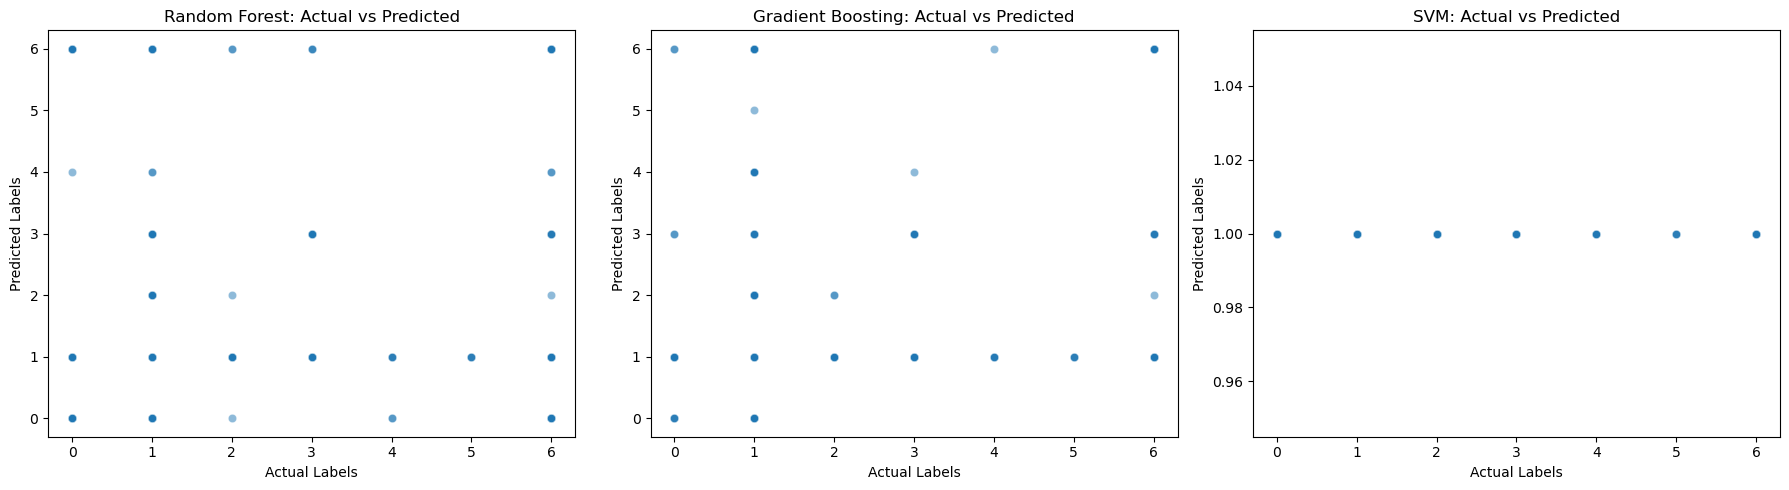

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = ["Random Forest", "Gradient Boosting", "SVM"]
predictions = [random_forest_pred, gradient_boosting_pred, svc_pred]

for i, (model, pred) in enumerate(zip(models, predictions)):
    sns.scatterplot(x=Y_test, y=pred, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"{model}: Actual vs Predicted")
    axes[i].set_xlabel("Actual Labels")
    axes[i].set_ylabel("Predicted Labels")

plt.tight_layout()
plt.show()


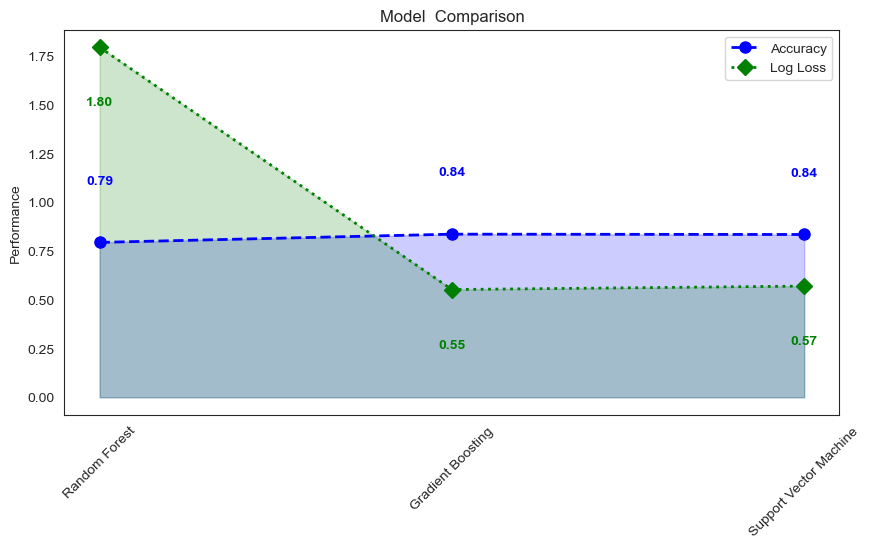

In [34]:
sns.set_style("white")

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(results_df["Model"], results_df["Accuracy"], marker='o', linestyle='--', color='blue', label="Accuracy", linewidth=2, markersize=8)
ax.scatter(results_df["Model"], results_df["Accuracy"], color='blue', s=50, edgecolor='black')
ax.plot(results_df["Model"], results_df["Log Loss"], marker='D', linestyle=':', color='green', label="Log Loss", linewidth=2, markersize=8)
ax.scatter(results_df["Model"], results_df["Log Loss"], color='green', s=50, edgecolor='black')
ax.fill_between(results_df["Model"], results_df["Accuracy"], alpha=0.2, color="blue")
ax.fill_between(results_df["Model"], results_df["Log Loss"], alpha=0.2, color="green")
for i, txt in enumerate(results_df["Accuracy"]):
    ax.annotate(f"{txt:.2f}", (results_df["Model"][i], results_df["Accuracy"][i] + 0.3), ha='center', fontsize=10, color="blue", fontweight="bold")
    
for i, txt in enumerate(results_df["Log Loss"]):
    ax.annotate(f"{txt:.2f}", (results_df["Model"][i], results_df["Log Loss"][i] - 0.3), ha='center', fontsize=10, color="green", fontweight="bold")
plt.xticks(rotation=45)
plt.ylabel("Performance")
plt.title("Model  Comparison")
plt.legend()
plt.show()


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test.values, dtype=torch.long)


In [38]:
train_data = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [39]:
class meteorite_land_NN(nn.Module):
    def __init__(self, input_size, output_size):
        super(meteorite_land_NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

In [41]:
input_size = X_train.shape[1]
output_size = len(label_encoder.classes_)  
model = meteorite_land_NN(input_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [43]:
epochs = 25
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    epoch_loss = 0.0
    correct = 0
    total = 0

    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == batch_Y).sum().item()
        total += batch_Y.size(0)

    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    train_acc = correct / total
    train_accuracies.append(train_acc)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {train_acc:.4f}")


Epoch 1/25, Loss: 0.5525, Accuracy: 0.8351
Epoch 2/25, Loss: 0.5517, Accuracy: 0.8351
Epoch 3/25, Loss: 0.5518, Accuracy: 0.8351
Epoch 4/25, Loss: 0.5535, Accuracy: 0.8348
Epoch 5/25, Loss: 0.5509, Accuracy: 0.8351
Epoch 6/25, Loss: 0.5505, Accuracy: 0.8351
Epoch 7/25, Loss: 0.5509, Accuracy: 0.8351
Epoch 8/25, Loss: 0.5498, Accuracy: 0.8351
Epoch 9/25, Loss: 0.5480, Accuracy: 0.8351
Epoch 10/25, Loss: 0.5481, Accuracy: 0.8351
Epoch 11/25, Loss: 0.5475, Accuracy: 0.8351
Epoch 12/25, Loss: 0.5475, Accuracy: 0.8351
Epoch 13/25, Loss: 0.5468, Accuracy: 0.8351
Epoch 14/25, Loss: 0.5454, Accuracy: 0.8351
Epoch 15/25, Loss: 0.5490, Accuracy: 0.8351
Epoch 16/25, Loss: 0.5450, Accuracy: 0.8351
Epoch 17/25, Loss: 0.5467, Accuracy: 0.8351
Epoch 18/25, Loss: 0.5444, Accuracy: 0.8353
Epoch 19/25, Loss: 0.5442, Accuracy: 0.8355
Epoch 20/25, Loss: 0.5453, Accuracy: 0.8354
Epoch 21/25, Loss: 0.5444, Accuracy: 0.8356
Epoch 22/25, Loss: 0.5426, Accuracy: 0.8358
Epoch 23/25, Loss: 0.5418, Accuracy: 0.83

In [45]:
model.eval()

with torch.no_grad():
    test_value = model(X_test_tensor)
    test_predict_value = torch.argmax(test_value, dim=1).numpy()

# Compute accuracy
nn_acc = accuracy_score(Y_test, test_predict_value)
print(f"Neural Network Test Accuracy: {nn_acc:.4f}")


Neural Network Test Accuracy: 0.8349


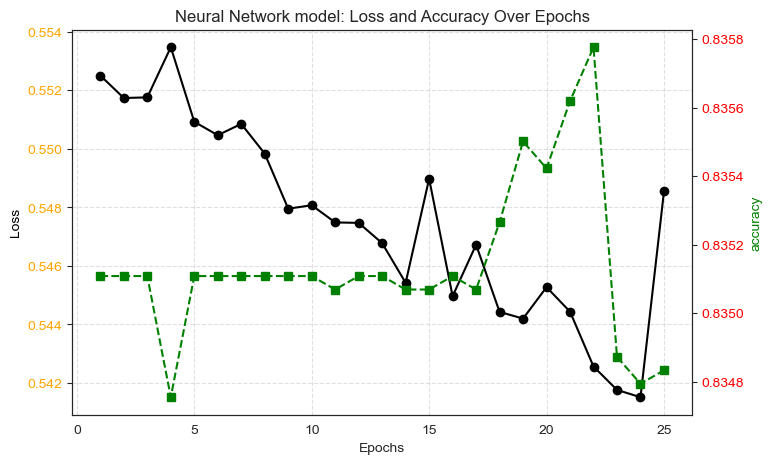

In [47]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(range(1, epochs + 1), train_losses, marker='o', linestyle='-', color='black', label="Train loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss", color="black")
ax1.tick_params(axis='y', labelcolor="orange")
ax2 = ax1.twinx()
ax2.plot(range(1, epochs + 1), train_accuracies, marker='s', linestyle='--', color='green', label="Train accuracy")
ax2.set_ylabel("accuracy", color="green")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("Neural Network model: Loss and Accuracy Over Epochs")
ax1.grid(True, linestyle='--', alpha=0.6)
plt.show()

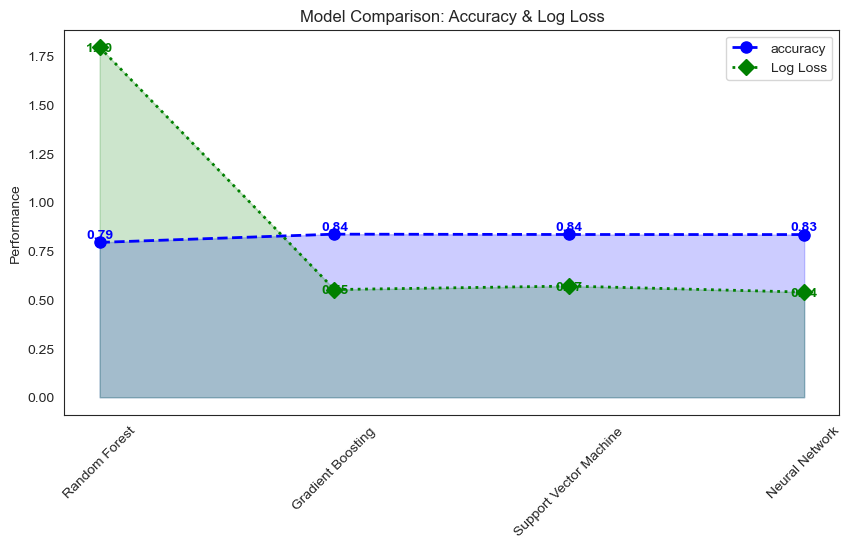

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.metrics import log_loss


random_forest_log_loss = log_loss(Y_test, random_forest.predict_proba(X_test))
gradient_boosting_log_loss = log_loss(Y_test, gradient_boosting.predict_proba(X_test))
svc_log_loss = log_loss(Y_test, svc.predict_proba(X_test))
with torch.no_grad():
    nn_pred_proba = torch.nn.functional.softmax(test_value, dim=1).cpu().numpy()
nn_log_loss = log_loss(Y_test, nn_pred_proba)
results_df = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting", "Support Vector Machine", "Neural Network"],
    "Accuracy": [random_forest_acc, gradient_boosting_acc, svc_acc, nn_acc],
    "Log Loss": [random_forest_log_loss, gradient_boosting_log_loss, svc_log_loss, nn_log_loss]
})
results_df = results_df.astype({"Accuracy": "float32", "Log Loss": "float32"})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(results_df["Model"], results_df["Accuracy"], marker='o', linestyle='--', color='blue', label="accuracy", linewidth=2, markersize=8)
ax.scatter(results_df["Model"], results_df["Accuracy"], color='blue', s=50, edgecolor='black')
ax.plot(results_df["Model"], results_df["Log Loss"], marker='D', linestyle=':', color='green', label="Log Loss", linewidth=2, markersize=8)
ax.scatter(results_df["Model"], results_df["Log Loss"], color='green', s=50, edgecolor='black')
ax.fill_between(results_df["Model"], results_df["Accuracy"], alpha=0.2, color="blue")
ax.fill_between(results_df["Model"], results_df["Log Loss"], alpha=0.2, color="green")
for i, txt in enumerate(results_df["Accuracy"]):
    ax.annotate(f"{txt:.2f}", (results_df["Model"][i], results_df["Accuracy"][i] + 0.02), ha='center', fontsize=10, color="blue", fontweight="bold")
    
for i, txt in enumerate(results_df["Log Loss"]):
    ax.annotate(f"{txt:.2f}", (results_df["Model"][i], results_df["Log Loss"][i] - 0.02), ha='center', fontsize=10, color="green", fontweight="bold")
plt.xticks(rotation=45)
plt.ylabel("Performance")
plt.title("Model Comparison: Accuracy & Log Loss")
plt.legend()
plt.show()



In [54]:
import joblib

# Save models
joblib.dump(random_forest, "random_forest_model.pkl")  
#joblib.dump(gradient_boosting, "gradient_boosting_model.pkl")  
#joblib.dump(svc, "svc_model.pkl")


['random_forest_model.pkl']

In [55]:
joblib.dump(gradient_boosting, "gradient_boosting_model.pkl")  



['gradient_boosting_model.pkl']

In [56]:
 joblib.dump(svc, "svc_model.pkl")

['svc_model.pkl']

In [58]:
torch.save(model.state_dict(), "meteorite_land_nn_weights.pth")
print("Neural network weights saved successfully.")


Neural network weights saved successfully.
